In [29]:
from __future__ import division
from sklearn.model_selection import train_test_split

from random_forest import RandomForest
from gui import Gui
import config
import helpers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from reducer import Reducer


In [30]:
red_ruleset = []
new_ruleset = []

feature_names = config.feature_names

## Setting variables

In [31]:
groundTruth = helpers.create_separate_files_status("data.csv")

In [32]:
x_train, x_test, y_train, y_test = train_test_split(helpers.create_dataframe("dataWoName.csv"), groundTruth, test_size=0.33,
                                                        random_state=42)

In [33]:
rf = RandomForest(x_test, y_test, x_train, y_train)

In [34]:
rf.score

0.9384615384615385

In [35]:
rules_rf = rf.get_all_rules(forest=rf.rf)

In [36]:
reducer = Reducer(rules_rf, rf)

In [37]:
red_ruleset = reducer.reduce_rules()

In [38]:
len(red_ruleset)

358

In [39]:
len(rules_rf)

358

In [40]:
percentage = np.arange(1, 100, 1)

In [41]:
numtoelim = [int((1 - (int(x) / 100)) * len(red_ruleset)) for x in percentage]

In [42]:
len(numtoelim)

99

In [14]:
import itertools

items = np.arange(1, 23, 1)
powerset = [x for length in range(len(items)+1) for x in itertools.combinations(items, length)]

In [15]:
len(powerset)

4194304

In [112]:
new_ruleset_1_2_3 = [reducer.eliminate_weakest_rules_2(favourite_features=[], k=4, numtoelim=x, ruleset=red_ruleset, xtrain=x_train, ytrain=y_train) for x in numtoelim]

In [113]:
number_rules = [len(new_ruleset_1_2_3[i]) for i in range(0, len(new_ruleset_1_2_3))]

In [114]:
vector_pred_1_2_3 = [rf.apply_ruleset_get_vector_new(ruleset=x, xtest=x_test) for x in new_ruleset_1_2_3]

In [115]:
acc = [rf.get_accuracy_of_ruleset_new(ruleset=x, xtest=x_test, ytest=y_test) for x in new_ruleset_1_2_3]

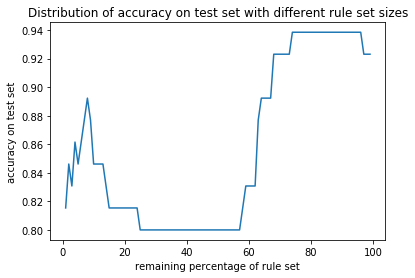

In [65]:
ax = sns.lineplot(percentage, acc)
ax.set(xlabel='remaining percentage of rule set', ylabel='accuracy on test set')
plt.title("Distribution of accuracy on test set with different rule set sizes") 
plt.savefig("plots/rule_score_pers/dist_acc_test_set.svg")

Text(0.5,1,'Distribution of accuracy on test set with different rule set sizes')

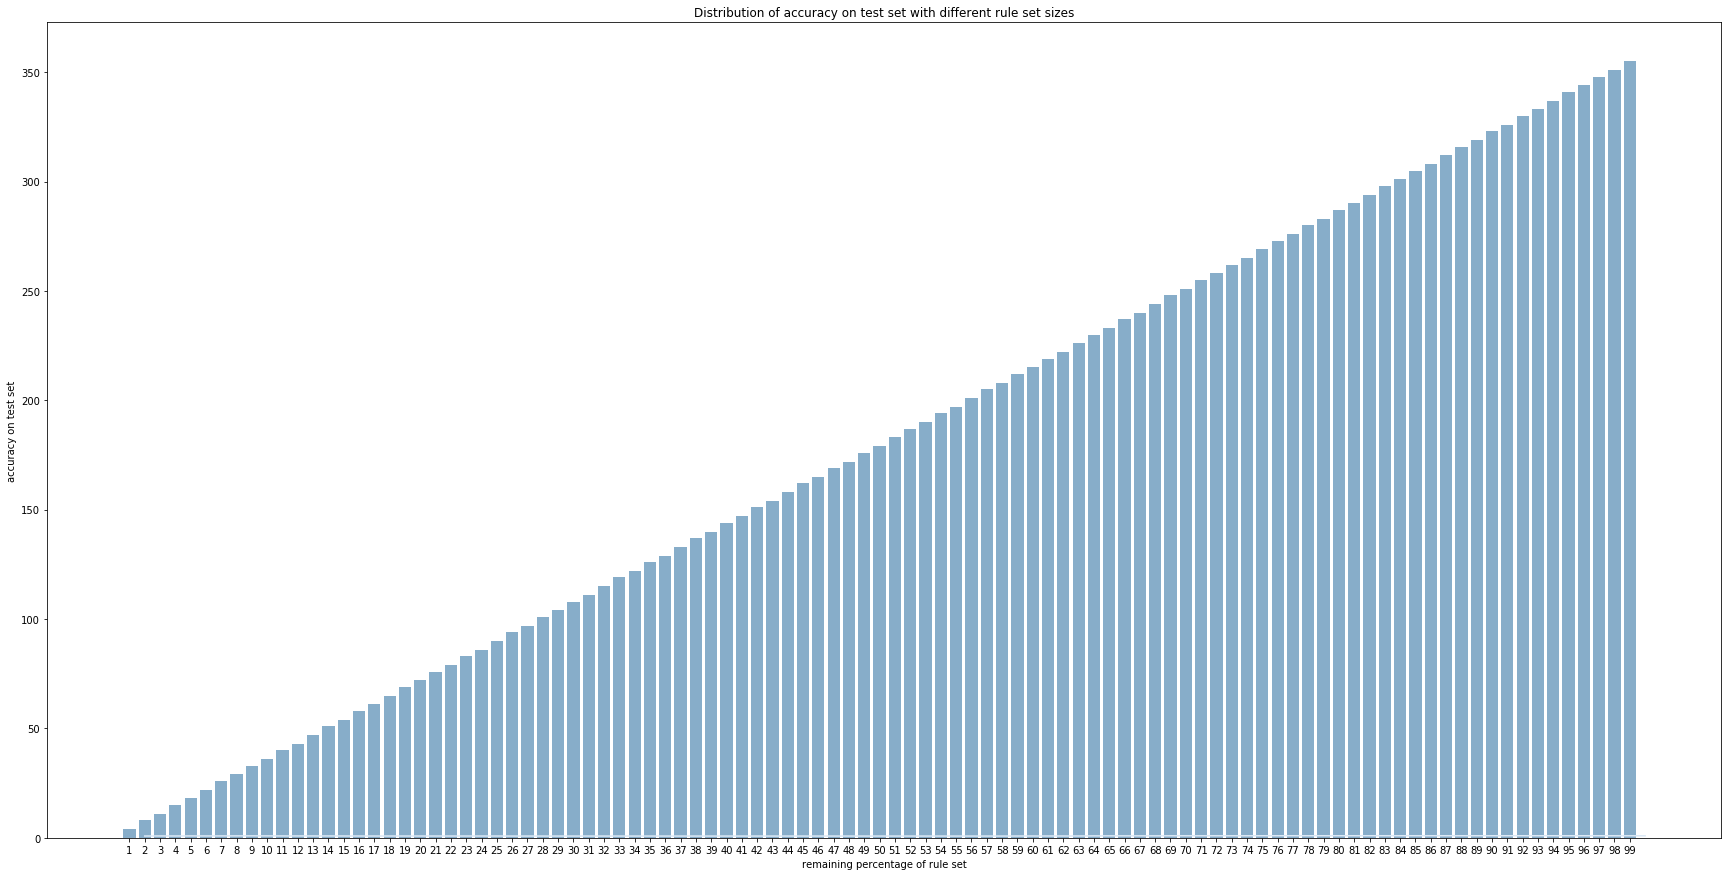

In [87]:
   
plt.figure(figsize=(30,15))

ax = sns.barplot(percentage, number_rules, color="#7caed4")

ax.set(xlabel='remaining percentage of rule set', ylabel='accuracy on test set')
plt.title("Distribution of accuracy on test set with different rule set sizes") 


## Plotting

<Figure size 432x288 with 0 Axes>

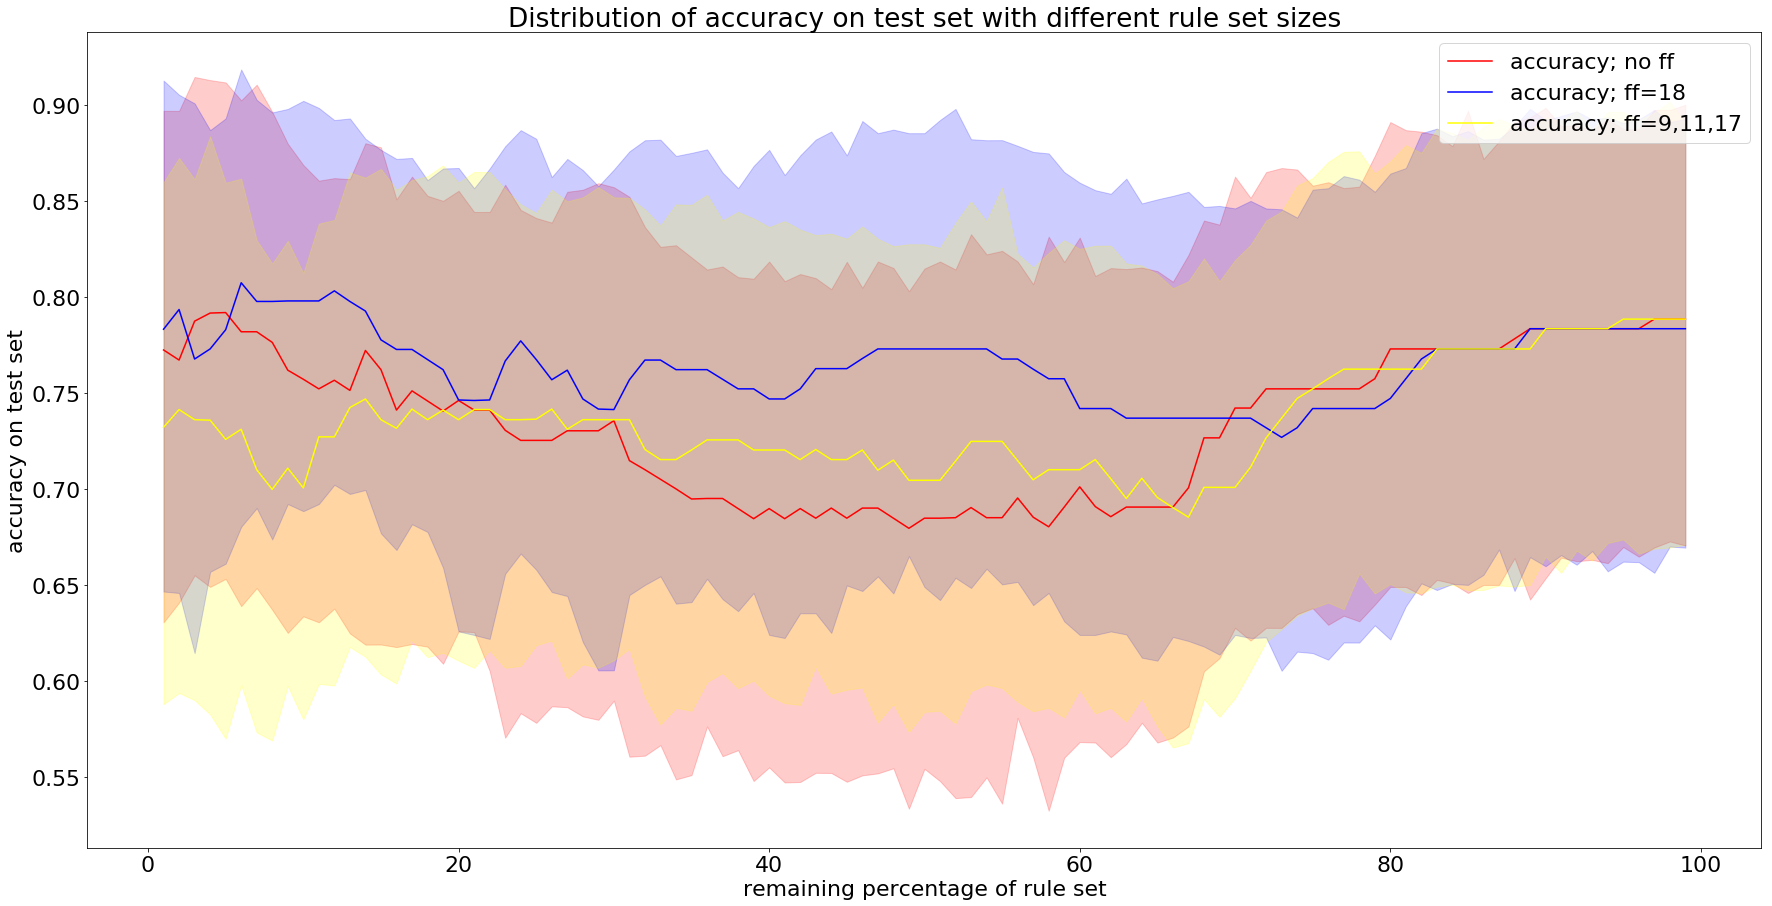

In [69]:
fig = plt.figure()
plt.figure(figsize=(30,15))

#ax1 = sns.barplot(percentage, number_rules, color="#bad1e3", label="number of rules")
#ax2 = ax1.twinx()
ax2 = sns.lineplot(x='percentage', y='accuracy', data=test_df_18_newperfscore_random, color='r', label='accuracy; no ff')
#ax3 = sns.lineplot(x='percentage', y='accuracy', data=test_df_18_newperfscore_random, color='green', label='mse; no ff')

#ax3 = sns.lineplot(x='percentage', y='accuracy', data=test_df_123, color='g', label='accuracy; ff=1,2,3')
#ax4 = sns.lineplot(x='percentage', y='mse', data=test_df_0_8_21_newperfscore, color='green', label='accuracy; ff=0,18,21')
#ax5 = sns.lineplot(x='percentage', y='mse', data=test_df_3_6_11_newperfscore, color='b', label='accuracy; ff=3,6,11')
#ax6 = sns.lineplot(x='percentage', y='accuracy', data=test_df_6_plus_mse, color='orange', label='accuracy; ff=6')
ax7 = sns.lineplot(x='percentage', y='accuracy', data=df_18_newperfscore_random_mse, color='blue', label='accuracy; ff=18')
#ax7 = sns.lineplot(x='percentage', y='accuracy', data=df_18_newperfscore_random_mse, color='green', label='mse; ff=18')

ax7 = sns.lineplot(x='percentage', y='accuracy', data=df_9_11_17_newperfscore_random_mse, color='yellow', label='accuracy; ff=9,11,17')
#ax8 = sns.lineplot(x='percentage', y='mse', data=df_9_11_17_newperfscore_random_mse, color='green', label='mse; ff=9,11,17')


#ax2 = sns.lineplot(percentage, acc, color='r', label="accuracy")
ax2.grid(False)
#ax1.set(xlabel='remaining percentage of rule set', ylabel='number of rules in rule set')
ax2.set(xlabel='remaining percentage of rule set', ylabel='accuracy on test set')
plt.title("Distribution of accuracy on test set with different rule set sizes") 
plt.legend()
#ax1.legend(loc ='upper left')

plt.rcParams.update({'font.size': 22})
plt.savefig("plots/rule_score_pers/dist_acc_test_set_number_rules_cv_comparison_different_ff_ex5.svg")
plt.show()

## Cross Validation

In [43]:
from sklearn.model_selection import KFold
import pandas as pd

In [44]:
def perform_k_fold_cv(nr_folds, favourite_features):
    
    kf = KFold(n_splits=nr_folds)
    data = helpers.create_dataframe("dataWoName.csv")
    
    ground_truth = np.array(groundTruth)
    all_accs = []
    all_mse = []
    all_perf_scores = []
    all_random = []
    #dataframe = pd.DataFrame()
    df = pd.DataFrame(columns={'fold', 'accuracy', 'percentage'})
    i = 1
    
    for train_index, test_index in kf.split(X=data, y=ground_truth):
        #print(train_index, test_index)
        x_train = data.iloc[train_index]
        y_train = ground_truth[train_index]
        x_test = data.iloc[test_index]
        y_test = ground_truth[test_index]
        
        #print(len(x_train), len(y_train), len(x_test), len(y_test))

        rf = RandomForest(x_test, y_test, x_train, y_train)
        rules_rf = rf.get_all_rules(forest=rf.rf)
        reducer = Reducer(rules_rf, rf)
        red_ruleset = reducer.reduce_rules()

        print(len(red_ruleset))
        numtoelim = [int((1 - (int(x) / 100)) * len(red_ruleset)) for x in percentage]

        new_ruleset = [reducer.eliminate_weakest_rules_2(favourite_features=favourite_features, k=4, numtoelim=x, ruleset=red_ruleset, xtrain=x_train, ytrain=y_train) for x in numtoelim]
        new_ruleset_random = [reducer.eliminate_weakest_rules_random(numtoelim=x, ruleset=red_ruleset) for x in numtoelim]
        
        acc = [rf.get_accuracy_of_ruleset_new(ruleset=x, xtest=x_test, ytest=y_test) for x in new_ruleset]
        mse = [rf.get_mse_of_ruleset_new(ruleset=x, xtest=x_test, ytest=y_test) for x in new_ruleset]
        perf_score = [rf.calculate_model_performance_parameter2(ruleset=x, xtest=x_test, ytest=y_test) for x in new_ruleset]
        acc_random = [rf.get_accuracy_of_ruleset_new(ruleset=x, xtest=x_test, ytest=y_test) for x in new_ruleset_random]
        mse_random = [rf.get_mse_of_ruleset_new(ruleset=x, xtest=x_test, ytest=y_test) for x in new_ruleset_random]
        perf_score_random = [rf.calculate_model_performance_parameter2(ruleset=x, xtest=x_test, ytest=y_test) for x in new_ruleset_random]
        
#         all_accs.append(acc)    
#         all_mse.append(mse)
#         all_perf_scores.append(perf_score)
#         all_accs_random.append(acc_random)
#         all_mse_random.append(mse_random)
#         all_perf_score_random.append(perf_score_random)
        
        df = df.append(pd.DataFrame({'fold': i, 'accuracy': acc, 'mse': mse, 'performance_score': perf_score, 'acc_random': acc_random, 'mse_random': mse_random, 'perf_score_random': perf_score_random, 'percentage': percentage}))
        i += 1

#     dataframe["folds"] = range(0, nr_folds)
#     dataframe["accuracy"] = all_accs
#     dataframe["mse"] = all_mse
#     dataframe["performance_score"] = all_perf_scores
#     dataframe["random"] = all_random
    
    #ax = sns.lineplot(x="percentage_of_rule_set_kept", y="accuracy", data=dataframe)
    
    return df

In [17]:
new_ruleset_random = [reducer.eliminate_weakest_rules_random(numtoelim=x, ruleset=red_ruleset) for x in numtoelim]

In [18]:
len(new_ruleset_random)

99

## Evaluation on different conditions

In [23]:
df_test_k_fold_cv_0_18_21_plus_mse, test_df_0_18_21_plus_mse = perform_k_fold_cv(10, [0,18,21])

470


/home/tamara/anaconda3/envs/cdss_python2/lib/python2.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


449
414
457
492
434
479
497
449
353


In [24]:
df_test_k_fold_cv_no_ff_plus_mse, test_df_no_ff_plus_mse = perform_k_fold_cv(10, [])

470
449
414
457
492
434
479
497
449
353


In [28]:
df_test_k_fold_cv_3_6_11_plus_mse, test_df_3_6_11_plus_mse = perform_k_fold_cv(10, [3, 6, 11])

470
449
414
457
492
434
479
497
449
353


In [29]:
df_test_k_fold_cv_18_plus_mse, test_df_18_plus_mse = perform_k_fold_cv(10, [18])

470
449
414
457
492
434
479
497
449
353


In [30]:
df_test_k_fold_cv_6_plus_mse, test_df_6_plus_mse = perform_k_fold_cv(10, [6])

470
449
414
457
492
434
479
497
449
353


In [218]:
df_test_k_fold_cv_no_ff, test_df_no_ff = perform_k_fold_cv(10, [])

470
449
414
457
492
434
479
497
449
353


In [240]:
df_test_k_fold_cv_3_6_11, test_df_3_6_11 = perform_k_fold_cv(10, [3,6,11])

470
449
414
457
492
434
479
497
449
353


In [247]:
df_test_k_fold_cv_6, test_df_6 = perform_k_fold_cv(10, [6])

470
449
414
457
492
434
479
497
449
353


In [255]:
df_test_k_fold_cv_18, test_df_18 = perform_k_fold_cv(10, [18])

470
449
414
457
492
434
479
497
449
353


In [48]:
df_test_k_fold_cv_no_ff_3, test_df_no_ff_3 = perform_k_fold_cv(10, [])

470
449
414
457
492
434
479
497
449
353


ValueError: too many values to unpack

In [21]:
df_test_k_fold_cv_0_8_21_newperfscore, test_df_0_8_21_newperfscore = perform_k_fold_cv(10, [0,8,21])

470
449
414
457
492
434
479
497
449
353


In [22]:
df_test_k_fold_cv_3_6_11_newperfscore, test_df_3_6_11_newperfscore = perform_k_fold_cv(10, [3, 6, 11])

470
449
414
457
492
434
479
497
449
353


In [24]:
df_test_k_fold_cv_18_newperfscore, test_df_18_newperfscore = perform_k_fold_cv(10, [18])

470
449
414
457
492
434
479
497
449
353


In [28]:
df_test_k_fold_cv_9_11_17_newperfscore, test_df_9_11_17_newperfscore = perform_k_fold_cv(10, [9,11,17])

470
449
414
457
492
434
479
497
449
353


In [25]:
test_df_18_newperfscore_random = perform_k_fold_cv(10, [])

470


/home/tamara/anaconda3/envs/cdss_python2/lib/python2.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


449
414
457
492
434
479
497
449
353


In [50]:
df_18_newperfscore_random_mse = perform_k_fold_cv(10, [18])

470
449
414
457
492
434
479
497
449
353


In [51]:
df_9_11_17_newperfscore_random_mse = perform_k_fold_cv(10, [9, 11, 17])

470
449
414
457
492
434
479
497
449
353


In [49]:
test_df_18_newperfscore_random

,acc_random,accuracy,fold,mse,mse_random,percentage,perf_score_random,performance_score
0,0.850000,1.000000,1,0.000000,0.150000,1,NaN,NaN
1,0.850000,0.950000,1,0.050000,0.150000,2,NaN,NaN
2,0.950000,0.950000,1,0.050000,0.050000,3,NaN,NaN
3,1.000000,0.950000,1,0.050000,0.000000,4,NaN,NaN
4,0.700000,0.950000,1,0.050000,0.300000,5,NaN,NaN
5,0.850000,0.950000,1,0.050000,0.150000,6,NaN,NaN
6,0.800000,0.950000,1,0.050000,0.200000,7,NaN,NaN
7,0.900000,0.950000,1,0.050000,0.100000,8,NaN,NaN
8,1.000000,0.850000,1,0.150000,0.000000,9,NaN,NaN
9,0.950000,0.850000,1,0.150000,0.050000,10,NaN,NaN


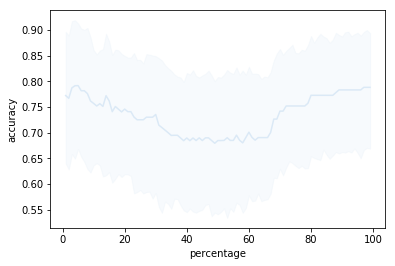

In [200]:
sns.lineplot(x='percentage', y='accuracy', data=test_df)

In [42]:
t = test_df_no_ff_3['accuracy']